In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data_desc = pd.read_excel(r"D:\ExceLR Solution\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='Description')
data = pd.read_excel(r"D:\ExceLR Solution\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')   

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data_desc.tail()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
21,Bonus_trans,NUMBER,NaN,Raw,Number of non-flight bonus transactions in the...
22,Flight_miles_12mo,NUMBER,NaN,Raw,Number of flight miles in the past 12 months
23,Flight_trans_12,NUMBER,NaN,Raw,Number of flight transactions in the past 12 m...
24,Days_since_enroll,NUMBER,NaN,Telcom,Number of days since Enroll_date
25,Award?,NUMBER,NaN,Telcom,"Dummy variable for Last_award (1=not null, 0=n..."


In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preprocessing :

### Missing value Detection

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

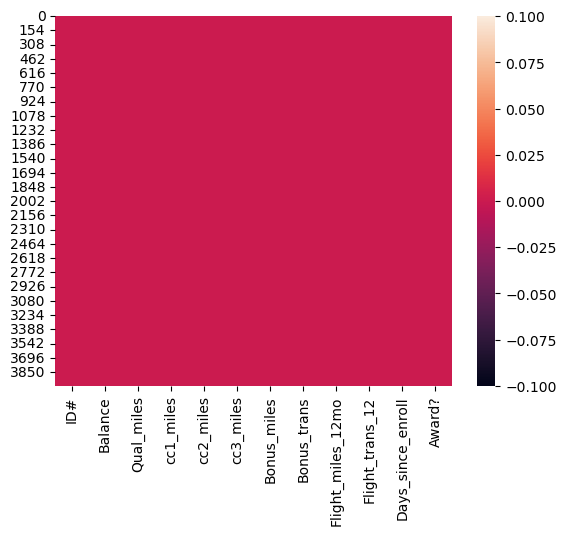

In [7]:
sns.heatmap(data.isnull())
plt.show()

In [8]:
data.isnull().sum() 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### Outlier Detection

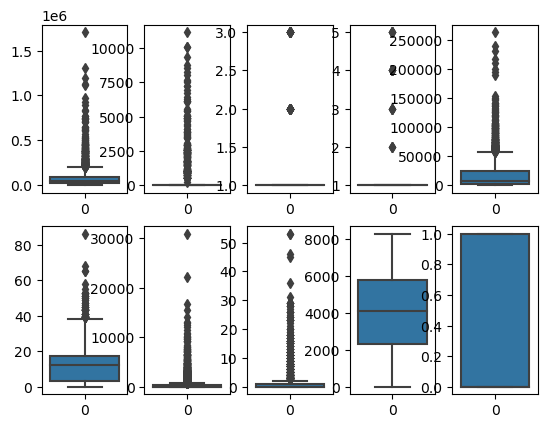

In [9]:
plt.subplot(2,5,1)
sns.boxplot(data['Balance'])
plt.subplot(2,5,2) 
sns.boxplot(data['Qual_miles'])
plt.subplot(2,5,3)
sns.boxplot(data['cc2_miles'])
plt.subplot(2,5,4)
sns.boxplot(data['cc3_miles'])
plt.subplot(2,5,5)
sns.boxplot(data['Bonus_miles'])
plt.subplot(2,5,6)
sns.boxplot(data['Bonus_trans'])
plt.subplot(2,5,7)
sns.boxplot(data['Flight_miles_12mo'])
plt.subplot(2,5,8)
sns.boxplot(data['Flight_trans_12']) 
plt.subplot(2,5,9)
sns.boxplot(data['Days_since_enroll'])
plt.subplot(2,5,10)
sns.boxplot(data['Award?'])  
plt.show()


In [10]:
def outlier_remover(df,column):
    Q1,Q3 = np.quantile(df[column],[0.25,0.75])
    IQR = Q3 - Q1 
    upper_limit = Q3 + 1.5*IQR 
    lower_limit = Q1 - 1.5*IQR 
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column]) 
    return df 

In [11]:
for i in list(data.columns): 
    data = outlier_remover(data,i)  

### Feature Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

In [13]:
scaler_pip = Pipeline([('Scaler',StandardScaler())]) 

In [14]:
df_scale =scaler_pip.fit_transform(data) 

### PCA 

In [15]:
from sklearn.decomposition import PCA 

In [16]:
pca = PCA(n_components=2)

In [17]:
df_2D = pca.fit_transform(df_scale)

In [18]:
df_2D[:,0]

array([-1.06822668, -1.08112902, -0.76358218, ..., -0.35584903,
       -1.761454  , -2.89891659])

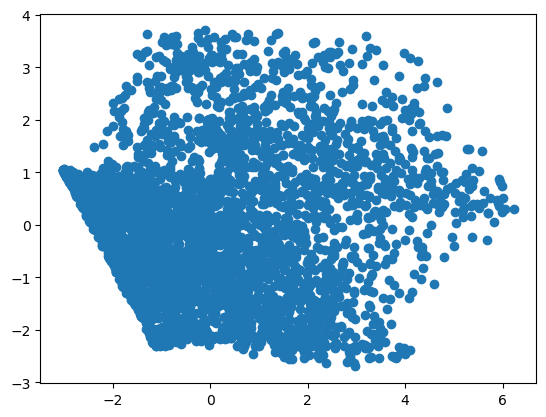

In [19]:
plt.scatter(df_2D[:,0],df_2D[:,1])
plt.show()

### Model Buliding :

In [20]:
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering 
from sklearn.metrics import silhouette_score 

#### K-Means Model 

In [21]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,40): 
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scale) 
    sse.append(km.inertia_)

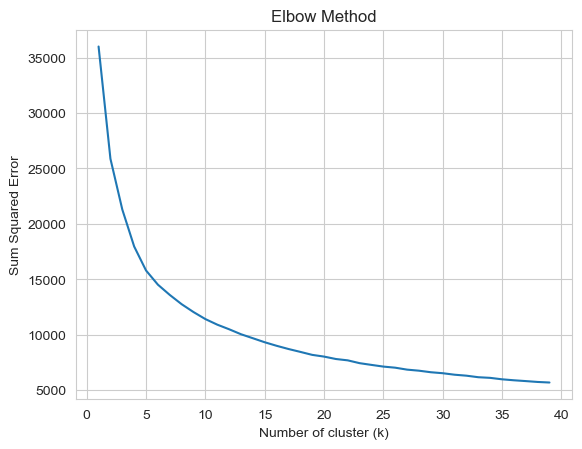

In [22]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,40), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [23]:
kn = KMeans(n_clusters=2)  

In [24]:
labels = kn.fit_predict(df_scale) 

In [25]:
silhouette_score(data,labels) 

0.3539437096493645

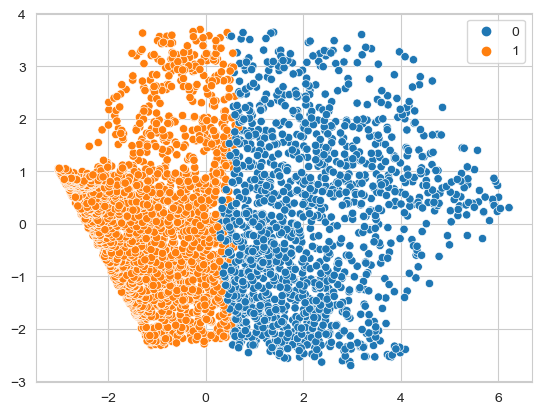

In [26]:
sns.scatterplot(data=df_2D,x=df_2D[:,0],y=df_2D[:,1],hue=labels)
plt.show() 

#### DB-SCAN Model 

In [27]:
dbscan_model = DBSCAN()

In [28]:
lables = dbscan_model.fit_predict(df_scale) 

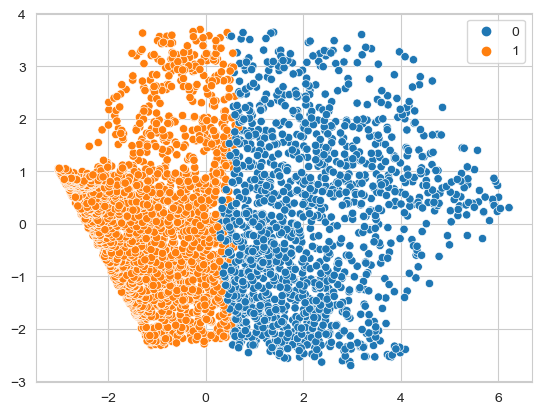

In [29]:
sns.scatterplot(data=df_2D,x=df_2D[:,0],y=df_2D[:,1],hue=labels)
plt.show()

#### Agglomerative Clustering Model 

In [30]:
Agglomerative_Clustering_model = AgglomerativeClustering() 

In [31]:
labels = Agglomerative_Clustering_model.fit_predict(df_scale)

In [32]:
Agglomerative_Clustering_model_score = silhouette_score(df_scale,labels)

In [33]:
print("Agglomerative_Clustering_model_score :",Agglomerative_Clustering_model_score)

Agglomerative_Clustering_model_score : 0.24792926845984306


In [35]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [36]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [37]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [39]:
model = model.fit(df_scale)

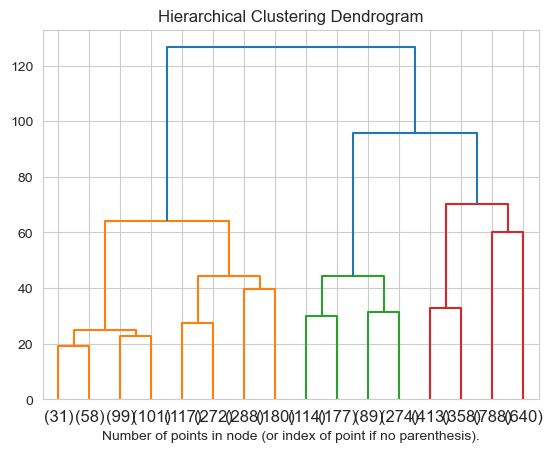

In [40]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [45]:
model = AgglomerativeClustering( n_clusters=2)

In [46]:
model.fit(df_scale)

AgglomerativeClustering()

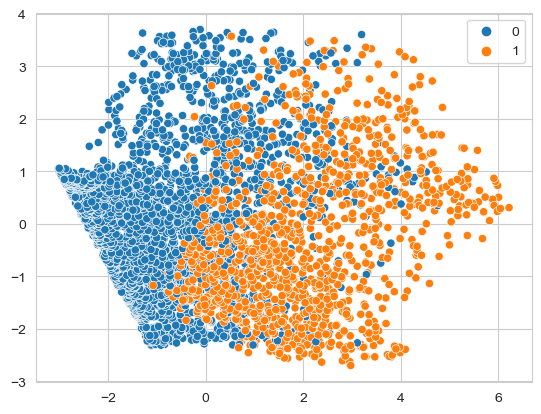

In [47]:
sns.scatterplot(data=df_2D,x=df_2D[:,0],y=df_2D[:,1],hue=model.labels_)
plt.show()